In [1]:
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
np.random.seed(42)
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize = 20) 
plt.rc('ytick', labelsize = 20)
plt.rc('text', usetex=True)
import seaborn as sns
sns.set(font_scale = 1.5)
from scipy import stats
import scipy.stats as scs

%matplotlib inline

In [2]:
df = pd.read_excel('../data/default of credit card clients.xls', index_col = 0)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df.shape

(30001, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null  ob

### Data set information:
- Number of Instances: 30000
- Number of Attributes: 24
- Attribute Characteristics: Object
- Area: Business
- Data Set Characteristics: Multivariate
- Associated Tasks: Classification
- Date Donated: 01/26/2106

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [7]:
df.nunique()

X1        82
X2         3
X3         8
X4         5
X5        57
X6        12
X7        12
X8        12
X9        12
X10       11
X11       11
X12    22724
X13    22347
X14    22027
X15    21549
X16    21011
X17    20605
X18     7944
X19     7900
X20     7519
X21     6938
X22     6898
X23     6940
Y          3
dtype: int64

- This function does not give me the statistics of the columns, so I need to change the types of the column.

In [8]:
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header

In [9]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Cleaning

- Renaming the columns in a more convenient way
- Changing the data type of the columns as needed
- Checking the null values and figure out how to deal with them
- Investigating the outliers and figure out how to deal with them

In [10]:
# renaming the columns
column_dict = {'LIMIT_BAL': 'credit_limit', 'SEX': 'sex', 'EDUCATION': 'education', 'MARRIAGE': 'marital_status', 'AGE': 'age', 
               'PAY_0': 'pay_status_sep', 'PAY_2': 'pay_status_aug', 'PAY_3': 'pay_status_jul', 'PAY_4': 'pay_status_jun', 'PAY_5': 'pay_status_may', 'PAY_6': 'pay_status_apr', 
               'BILL_AMT1': 'bill_sep', 'BILL_AMT2': 'bill_aug', 'BILL_AMT3': 'bill_jul', 'BILL_AMT4': 'bill_jun', 'BILL_AMT5': 'bill_may', 'BILL_AMT6': 'bill_apr', 
               'PAY_AMT1': 'pay_sep', 'PAY_AMT2': 'pay_aug', 'PAY_AMT3': 'pay_jul', 'PAY_AMT4': 'pay_jun', 'PAY_AMT5': 'pay_may', 'PAY_AMT6': 'pay_apr', 
               'default payment next month': 'next_default_payment'}

df = df.rename(columns = column_dict)

In [11]:
df.columns

Index(['credit_limit', 'sex', 'education', 'marital_status', 'age',
       'pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_sep', 'bill_aug', 'bill_jul',
       'bill_jun', 'bill_may', 'bill_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr', 'next_default_payment'],
      dtype='object', name='ID')

### Attribute Information:

- credit_limit: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
- sex: 1 = male; 2 = female
- education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
- marital_status: 1 = married; 2 = single; 3 = others
- age: year
- pay_status: History of past payment from April to September 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- bill_month: Amount of bill statement (NT dollar)
- pay_month: Amount of previous payment (NT dollar)

In [12]:
sum(df.duplicated())

35

### 35 datapoints are duplicated and need to be removed.

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
# changing the columns' dtypes
df = df.astype('int32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   credit_limit          29965 non-null  int32
 1   sex                   29965 non-null  int32
 2   education             29965 non-null  int32
 3   marital_status        29965 non-null  int32
 4   age                   29965 non-null  int32
 5   pay_status_sep        29965 non-null  int32
 6   pay_status_aug        29965 non-null  int32
 7   pay_status_jul        29965 non-null  int32
 8   pay_status_jun        29965 non-null  int32
 9   pay_status_may        29965 non-null  int32
 10  pay_status_apr        29965 non-null  int32
 11  bill_sep              29965 non-null  int32
 12  bill_aug              29965 non-null  int32
 13  bill_jul              29965 non-null  int32
 14  bill_jun              29965 non-null  int32
 15  bill_may              29965 non-null  int32
 16  bill_apr 

### Changing the data type from "object" to "int32" decreases the memory usage from 5.7MB to 3 MB.

In [16]:
df.describe()

ID,credit_limit,sex,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,next_default_payment
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [17]:
df['sex'].value_counts()

2    18091
1    11874
Name: sex, dtype: int64

In [18]:
df['education'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [19]:
df['marital_status'].value_counts()

2    15945
1    13643
3      323
0       54
Name: marital_status, dtype: int64

In [20]:
df['pay_status_apr'].value_counts()

 0    16286
-1     5736
-2     4865
 2     2766
 3      184
 4       48
 7       46
 6       19
 5       13
 8        2
Name: pay_status_apr, dtype: int64

### These columns has some undocumented values:
1. 'education' has 3 values of 0, 5, and 6.
2. 'marital_status' has value of 0.
3. 'pay_status_month' has value of 0 and -2.
4. 'bill_month' has negative values which may be considered as credit, since the corresonding 'pay_month' values are zero, which means no payment was needed. Having this said, the -2 label for 'pay_status_month' may mean no payment is needed.

In [21]:
# 1. 'education' has 3 values of 0, 5, and 6.

df[(df['education'] < 1) | (df['education'] > 4)].education.count()

345

- About 1% of the 'education' column is not within the defined range of [1,4], and since that is a small portion of the data, they can be either removed or documented as "other". I chose to remove them.

In [22]:
df.drop(df[(df['education'] <1) | (df['education'] > 4)].index, inplace = True)

In [23]:
df.shape

(29620, 24)

In [24]:
# 2. 'marital_status' has value of 0.

df[df['marital_status'] == 0].marital_status.count()

54

- Less than 1% of the 'marital_status' column is not within the defined range of [1,3], and since that is a small portion of the data, they can be either removed or documented as "other". I chose to remove them.

In [25]:
df.drop(df[df['marital_status'] == 0].index, inplace = True)

In [26]:
df.shape

(29566, 24)

In [27]:
# 3. 'pay_status_month' has value of 0 and -2.

# calculate how many instances has 0 in their pay_status_month for Apr-Sep:

lst = []
for i in range(5, 11):
    lst.append(df[df[df.columns[i]] == 0].shape[0])
lst

[14499, 15476, 15518, 16204, 16684, 16053]

In [28]:
lst = []
for i in range(5, 11):
    lst.append(df[df[df.columns[i]] == -2].shape[0])
lst

[2699, 3692, 3997, 4257, 4449, 4776]

- Large number of data has 'pay_status_month' equal to 0 and -2 which are not documented. Since the late payment starts from 1, shall I consider -2, -1 , and 0 as the ontime payment and give all of them the value of 0?

- More investigations are needed.

In [29]:
df[df['pay_status_jul'] == 7][['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_sep', 'bill_aug', 'bill_jul',
       'bill_jun', 'bill_may', 'bill_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr']].head(20)

ID,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
674,2,2,7,7,7,6,2400,2400,2400,2400,2400,1800,0,0,0,0,0,0
863,2,2,7,7,7,7,2450,2450,2450,2450,2450,2450,0,0,0,0,0,0
1147,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
1250,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
1486,2,2,7,7,7,6,2400,2400,2400,2400,2400,1800,0,0,0,0,0,0
1895,1,3,7,6,7,8,72652,90461,89011,96593,105083,103522,20000,0,10000,10000,0,0
2406,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
3087,2,2,7,7,7,7,300,300,300,300,300,300,0,0,0,0,0,0
5838,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
5916,2,2,7,7,7,7,150,150,150,150,150,150,0,0,0,0,0,0


- The pay_status_month data seem to be inaccurate, there is no consistency for some of the instances. Therefore, I need to regenerate some columns.

In [30]:
df['default_sep'] = df['pay_sep'] - df['bill_aug']
df['default_aug'] = df['pay_aug'] - df['bill_jul']
df['default_jul'] = df['pay_jul'] - df['bill_jun']
df['default_jun'] = df['pay_jun'] - df['bill_may']
df['default_may'] = df['pay_may'] - df['bill_apr']

In [31]:
# df[['default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may']].head()

In [32]:
# df[['pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may']].head()

In [33]:
# df[['bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']].head()

In [34]:
default_columns = ['default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may']
for col in default_columns:
    df[col][df[col] >= 0] = 0
    df[col][df[col] < 0] = 1
df['default_count'] = sum(df[col] for col in default_columns)

In [35]:
df['default_count'].describe()

count    29566.000000
mean         3.263275
std          2.125415
min          0.000000
25%          1.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: default_count, dtype: float64

### default_sum is the column that I am going to use as a metric for the number of the defaults for each instance. Therefore, the unnccessary columns should be removed.

In [36]:
df = df.drop(['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may'], axis = 1)

In [37]:
df = df[['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count',
         'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
         'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'next_default_payment']]

In [38]:
df.head()

ID,credit_limit,sex,education,marital_status,age,default_count,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,next_default_payment
1,20000,2,2,1,24,1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,5,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,5,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,5,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### The statistics of 'credit_limit'

In [39]:
df['credit_limit'].value_counts().sort_values(ascending = False).head()

50000     3329
20000     1954
30000     1586
80000     1539
200000    1494
Name: credit_limit, dtype: int64

In [40]:
df['credit_limit'].mean(), df['credit_limit'].std()

(167507.73455996753, 129956.8978636351)

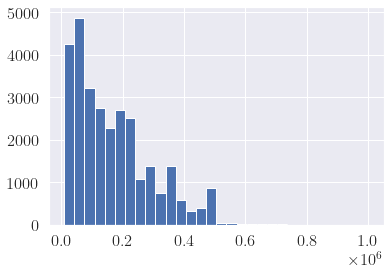

In [41]:
df['credit_limit'].hist(bins = 30);

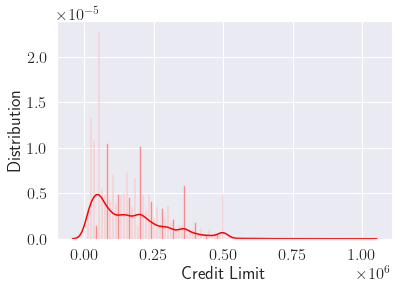

In [42]:
ax = sns.distplot(df['credit_limit'], kde = True, bins = 200, color = "red");
ax.set(xlabel = 'Credit Limit', ylabel = 'Distribution');

- There is a broad range associated with 'credit_limit' column.

### The statistics of 'age'

In [43]:
df['age'].mean(), df['age'].std()

(35.46654941486843, 9.214820556496239)

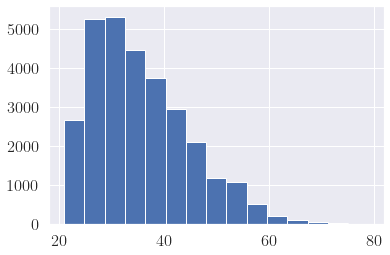

In [44]:
df['age'].hist(bins = 15);

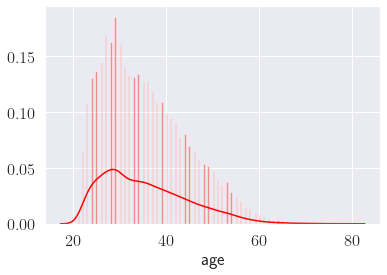

In [45]:
sns.distplot(df['age'], kde = True, bins = 200, color = "red");
ax.set(xlabel = 'Age', ylabel = 'Distribution');

### The statistics of 'default_count'

In [46]:
df['default_count'].mean(), df['default_count'].std()

(3.263275383886897, 2.125415484788962)

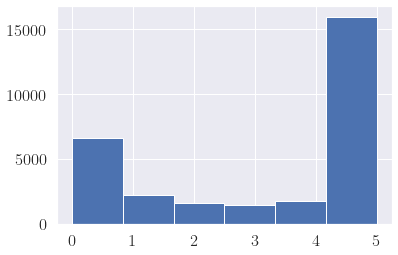

In [47]:
df['default_count'].hist(bins = 6);

In [48]:
# sns.distplot(df['default_count'], kde = True, bins = 200, color = "red");

- There is a broad range associated with 'default_count' column.

### The probability of 'next_default_payment'

In [49]:
df['next_default_payment'].mean()
# df.query('next_default_payment == 1').shape[0]/df.shape[0]

0.2231955624704052

- About 22% of the clients have default in their next payment.

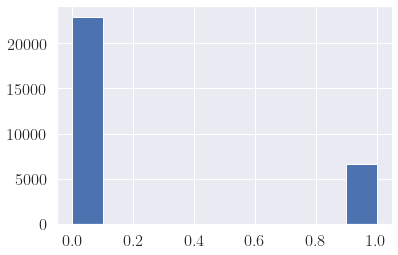

In [50]:
df['next_default_payment'].hist();

- Some values associated to bill columns and pay columns seems to be very large, more investigations are needed to see whether they are outliers or they just belong to the customer with higher statements and payments.

## EDA

### Step 1: Finding the correlations between attributes

### Let's have a general idea of some feature correlations:

In [51]:
corrMatrix = df[['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count', 'next_default_payment']].corr(method = 'pearson')
corrMatrix

ID,credit_limit,sex,education,marital_status,age,default_count,next_default_payment
ID,,,,,,,
credit_limit,1.000000,0.025079,-0.243786,-0.109697,0.144143,-0.264200,-0.154711
sex,0.025079,1.000000,0.012026,-0.030054,-0.091625,-0.057582,-0.039594
education,-0.243786,0.012026,1.000000,-0.148057,0.187473,0.157948,0.049126
marital_status,-0.109697,-0.030054,-0.148057,1.000000,-0.418014,0.060915,-0.026581
age,0.144143,-0.091625,0.187473,-0.418014,1.000000,-0.076918,0.014150
default_count,-0.264200,-0.057582,0.157948,0.060915,-0.076918,1.000000,0.089188
next_default_payment,-0.154711,-0.039594,0.049126,-0.026581,0.014150,0.089188,1.000000


In [52]:
# cmap = sns.cm.rocket_r
# A = sns.heatmap(corrMatrix, annot = True, annot_kws = {"size": 14}, fmt = '0.2f', cbar_kws = {'label' : 'Feature Correlation'});
# plt.xlabel('Features') 
# plt.ylabel('Features') 
# plt.title('Feature Correlation');
# A.set_ylim(0, corrMatrix.shape[1]);
# labels = [col for col in corrMatrix.columns]
# labels = ['Credit Limit', 'Sex', 'Education', 'Marital Status', 'Age', 'default_sum', 'Next Default Payment'];
# plt.xticks(rotation = 90);
# plt.yticks(rotation = 0);
# A.set_xticklabels(labels);
# A.set_yticklabels(labels);
# A.invert_yaxis()

### Multicollinearity is not observed among any of this features, but we may need more correlation with feature engineering.

In [53]:
# scatter_matrix(corrMatrix, figsize = (10, 10));

In [54]:
education_corr = []
for i in range(1, 5):
    education_corr.append(df[(df['education'] == i)]['credit_limit'].corr(df[(df['education'] == i)]['next_default_payment']))

education_corr

[-0.12581410178442187,
 -0.15953511984167068,
 -0.1459269409362515,
 -0.1694225386700357]

In [55]:
marital_corr = []
for i in range(1, 4):
    marital_corr.append(df[(df['marital_status'] == i)]['credit_limit'].corr(df[(df['marital_status'] == i)]['next_default_payment']))

marital_corr

[-0.16324945939493693, -0.15381292183772383, -0.15074227583607594]

In [56]:
sex_corr = []
for i in range(1, 3):
    sex_corr.append(df[(df['sex'] == i)]['credit_limit'].corr(df[(df['sex'] == i)]['next_default_payment']))

sex_corr

[-0.15742697606636852, -0.15124939584144328]

### Investigating the attributes correlations in more detail:

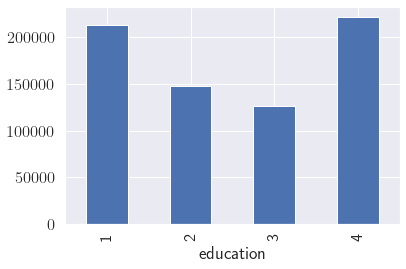

In [57]:
# Mean of credit limit for each education level
df.groupby('education')['credit_limit'].mean().plot(kind='bar');

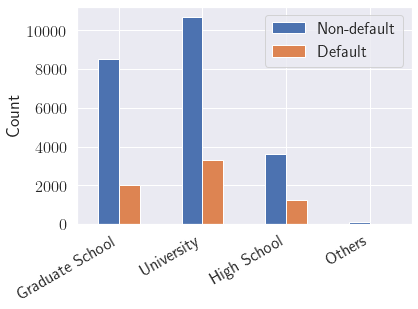

In [58]:
df_education = df.groupby(['education', 'next_default_payment']).size()
df_education.unstack(1).plot(kind='bar', stacked = False);
del df_education
plt.xlabel('');
plt.ylabel('Count');
plt.xticks(np.arange(4), ['Graduate School', 'University', 'High School', 'Others'])
plt.xticks(rotation = 30, horizontalalignment = 'right')
plt.legend(['Non-default', 'Default']);
plt.savefig('../figure/barplot_education')

In [59]:
df['credit_limit'].corr(df['education'], method='pearson')

-0.24378597191286405

In [60]:
df['next_default_payment'].corr(df['education'])

0.04912592265803396

In [61]:
# plt.scatter(df['education'], df['credit_limit']);

### Observation #1: The higher the education, the more the credit line. education = 4 is not clear though.

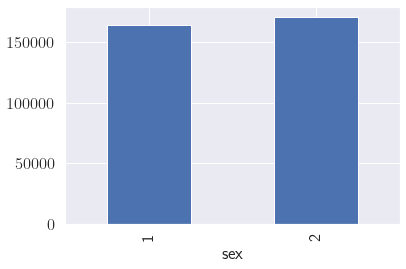

In [62]:
df.groupby('sex')['credit_limit'].mean().plot(kind='bar');

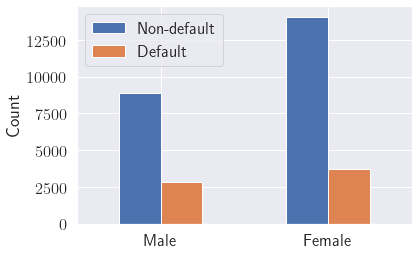

In [63]:
df_sex = df.groupby(['sex', 'next_default_payment']).size()
df_sex.unstack(1).plot(kind = 'bar', stacked = False);
del df_sex
plt.xlabel('')
plt.ylabel('Count');
plt.xticks(np.arange(2), ['Male', 'Female'])
plt.xticks(rotation=0)
plt.legend(['Non-default', 'Default']);
plt.savefig('../figure/barplot_data')

In [64]:
df['credit_limit'].corr(df['sex'], method = 'pearson')

0.025079298588694454

In [65]:
df['next_default_payment'].corr(df['sex'], method = 'kendall')

-0.03959351869094116

In [66]:
df['next_default_payment'].corr(df['sex'], method = 'spearman')

-0.03959351869094115

### Observation #2: The sex attribute does not have any correlation with the credit limit.

In [67]:
# temp = df.groupby('marital_status')['credit_limit'].mean().plot(kind = 'bar') 

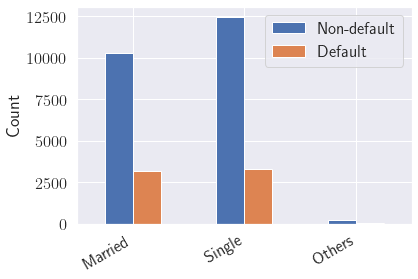

In [68]:
df_marital_status = df.groupby(['marital_status', 'next_default_payment']).size()
df_marital_status.unstack(1).plot(kind = 'bar', stacked = False);
del df_marital_status
plt.xlabel('');
plt.ylabel('Count');
plt.xticks(np.arange(3), ['Married', 'Single', 'Others'])
plt.xticks(rotation = 30, horizontalalignment = 'right')
plt.legend(['Non-default', 'Default']);
plt.savefig('../figure/barplot_marital')

In [69]:
df['credit_limit'].corr(df['marital_status'])

-0.1096965619671684

In [70]:
df['next_default_payment'].corr(df['marital_status'])

-0.026580538040758005

### Observation #3: Married clients seem to have higher credit line. That makes sense as the credit_line attribute includes the individual consumer credit and his/her family (supplementary) credit.

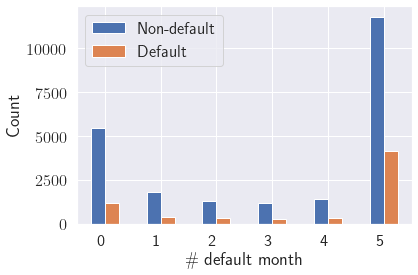

In [71]:
df_marital_status = df.groupby(['default_count', 'next_default_payment']).size()
df_marital_status.unstack(1).plot(kind = 'bar', stacked = False);
del df_marital_status
plt.xlabel(r'$\#$ default month');
plt.ylabel('Count');
plt.xticks(np.arange(0,6))
plt.xticks(rotation = 360 , horizontalalignment = 'right')
plt.legend(['Non-default', 'Default']);
plt.savefig('../figure/barplot_previous_default_count')

In [72]:
df['credit_limit'].corr(df['age'])

0.14414251967621422

In [73]:
df['next_default_payment'].corr(df['age'])

0.014150420546392605

In [74]:
# plt.scatter(df['age'], df['credit_limit']); 

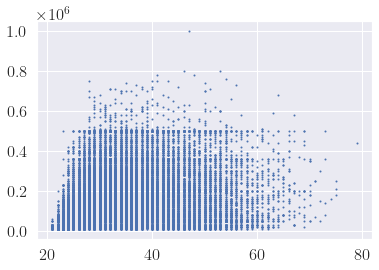

In [75]:
plt.plot(df['age'], df['credit_limit'], linestyle='', marker='o', markersize=1);

### Observation #4: There is no significant correlation between age and the credit limit.

In [76]:
# g = sns.FacetGrid(data = df, col = 'sex', col_wrap = 2, margin_titles = True)
# g.map(plt.scatter,'education', 'credit_limit')
# g.fig.subplots_adjust(top = 0.8)
# g.fig.suptitle('Credit Limit vs Education', fontsize = 20)
# g.add_legend();

### Let's break the dataframe into two, one with 'next_default_payment' = 0 and one with 'next_default_payment' = 1 and do the EDA for these two groups.

In [77]:
# temp1 = df[df['next_default_payment'] == 0]
# temp2 = df[df['next_default_payment'] == 1]
# temp_col = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count']

# f, axs = plt.subplots(2, 3, figsize = (10, 5), sharex = False, sharey = False)
# for i, axs in enumerate(axs.flatten()):
#     sns.distplot(temp1[temp_col[i]], kde = True, bins = 200, color = "red", ax = axs, label = 'Non-default');
#     sns.distplot(temp2[temp_col[i]], kde = True, bins = 200, color = "blue", ax = axs, label = 'Default');
#     axs.legend(labels = ['Non-default','Default'], loc='upper right')
    
# del temp1
# del temp2
# del temp_col

In [78]:
# temp_col = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count']
# temp_col_default = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count', 'next_default_payment']
# temp_df = df[temp_col_default]
# temp_df = temp_df.melt(['next_default_payment'], var_name = 'cols',  value_name = 'vals')
# g = sns.FacetGrid(temp_df, col = 'cols', hue = "next_default_payment", palette = "Set1", col_wrap = 3, sharex = False, sharey = False);
# g = (g.map(sns.distplot, "vals", hist = False, rug = True));
# g.add_legend(labels = ['Non-default', 'Default']);

# del temp_df
# del temp_col_default

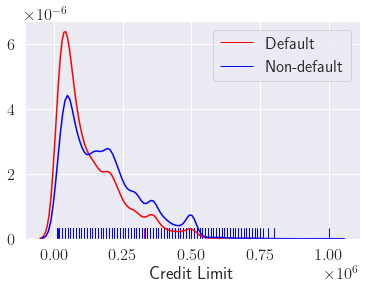

In [79]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['credit_limit'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['credit_limit'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.xlabel('Credit Limit');
plt.legend(['Default', 'Non-default']);
plt.savefig('../figure/normalized_credit_limit')

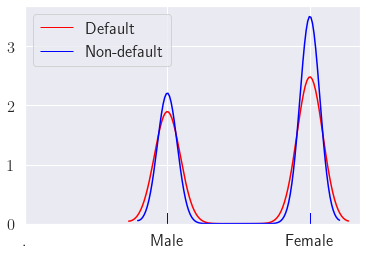

In [80]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['sex'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['sex'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.legend(['Default', 'Non-default']);
plt.xlabel("")
plt.xticks(np.arange(3), ['.', 'Male', 'Female'])
plt.savefig('../figure/normalized_sex')

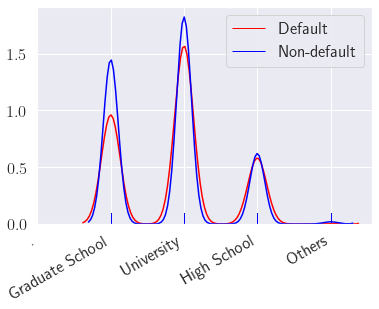

In [81]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['education'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['education'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.legend(['Default', 'Non-default']);
plt.xlabel("")
plt.xticks(rotation = 30, horizontalalignment = 'right')
plt.xticks(np.arange(5), ['.', 'Graduate School', 'University', 'High School', 'Others'])
plt.savefig('../figure/normalized_education')


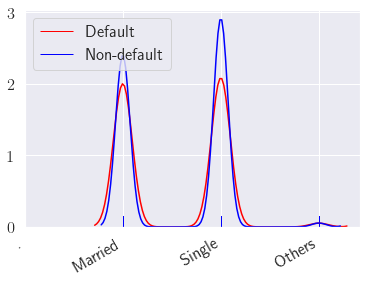

In [82]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['marital_status'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['marital_status'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.legend(['Default', 'Non-default']);
plt.xlabel('');
plt.xticks(rotation = 30, horizontalalignment = 'right')
plt.xticks(np.arange(4), ['.', 'Married', 'Single', 'Others'])
plt.savefig('../figure/normalized_marital')


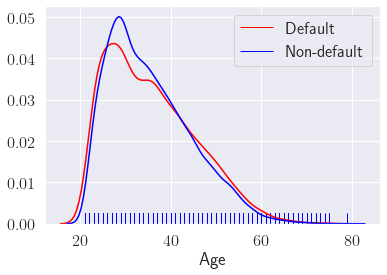

In [83]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['age'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['age'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.legend(['Default', 'Non-default']);
plt.xlabel('Age');


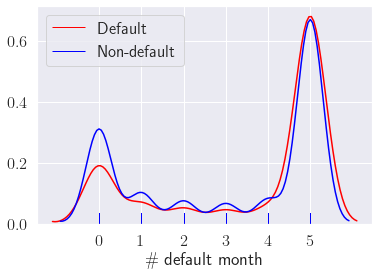

In [84]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['default_count'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['default_count'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
plt.legend(['Default', 'Non-default']);
plt.xticks(np.arange(0,6))
plt.xlabel(r'$\#$ default month');

### Observations #5: 
> Comapring the above plots for the average of the attributes shows that: 
- The clients with no default have lower credit line for the lower range while they have higher credit line for the lower range.
- The female clients with no default are more than the male clients.
- The educated clients with no default are more than the clients with less education.
- The single clients with no default are more than the married ones.
- The age does not seem to be a contributor, as its distribution for both categories are close. The combination of age and other attributes may be an important driver though.

### Feature Engineering
- I may be able to define a new parameter which is the combination of existing parameters, like age and sex, age and marital_status, sex and marital_status.
- The new feature can also be defined by performing some calculations on the existing columns. One of the parameters that seems interesting to me is the credit utilization in each month (balance divded by credit line) or maybe the average of all utilizations for each client.

In [85]:
# Defining credit utilization
df['credit_usage'] = (df['bill_aug'] + df['bill_jul'] + df['bill_jun'] + df['bill_may'] + df['bill_apr']) / 5 / df['credit_limit']

In [86]:
df['credit_usage'].describe()

count    29566.000000
mean         0.362934
std          0.348708
min         -0.393500
25%          0.026626
50%          0.266288
75%          0.666526
max          5.146110
Name: credit_usage, dtype: float64

In [87]:
df[df['credit_usage'] > 1]['credit_usage'].count()

627

### The data shows that 627 clients have their bill more than their credit line which in non-sense. So I need to check how this works for each month. These should be cleaned.

In [88]:
# Number of clients who has their April statement more than their credit limit
df[df['bill_apr'] > df['credit_limit']]['credit_limit'].count()

792

In [89]:
# Number of clients who have their May statement more than their credit limit
df[df['bill_may'] > df['credit_limit']]['credit_limit'].count()

807

In [90]:
# Number of clients who have their June statement more than their credit limit
df[df['bill_jun'] > df['credit_limit']]['credit_limit'].count()

999

In [91]:
# Number of clients who have their July statement more than their credit limit
df[df['bill_jul'] > df['credit_limit']]['credit_limit'].count()

1553

In [92]:
# Number of clients who have their August statement more than their credit limit
df[df['bill_aug'] > df['credit_limit']]['credit_limit'].count()

1907

In [93]:
# Number of clients who have one of their April-August statements more than their credit limit

df[(df['bill_apr'] > df['credit_limit']) | (df['bill_may'] > df['credit_limit']) |(df['bill_jun'] > df['credit_limit']) | (df['bill_jul'] > df['credit_limit']) | (df['bill_aug'] > df['credit_limit']) | (df['bill_sep'] > df['credit_limit'])]['credit_limit'].count()


3869

In [94]:
# Number of clients who have all of their April-August statements more than their credit limit
df[(df['bill_apr'] > df['credit_limit']) & (df['bill_may'] > df['credit_limit']) & (df['bill_jun'] > df['credit_limit']) & (df['bill_jul'] > df['credit_limit']) & (df['bill_aug'] > df['credit_limit']) & (df['bill_sep'] > df['credit_limit'])]['credit_limit'].count()


181

### I will make an assumption that their credit line got decreased at the time of collecting the data.

### Grouping "sex" and "marital_status"

In [95]:
# # sm column refers to "sex"-"marital_status" feature:

# df.loc[((df['sex'] == 1) & (df['marital_status'] == 1)) , 'sm'] = 1 # married male
# df.loc[((df['sex'] == 1) & (df['marital_status'] == 2)) , 'sm'] = 2 # single male
# df.loc[((df['sex'] == 2) & (df['marital_status'] == 1)) , 'sm'] = 3 # married female
# df.loc[((df['sex'] == 2) & (df['marital_status'] == 2)) , 'sm'] = 4 # single female


### Grouping "sex" and "age"

In [96]:
# # df['age_groups'] = pd.cut(df['age'], [21, 29, 80])
# # df['age_groups'] 
# df['age_groups'] = pd.cut(df['age'], [21, 29, 80], labels = [29, 40])
# df['age_groups'].hist();
# df['age_groups'].value_counts()

In [97]:
# # sa column refers to "sex"-"age" feature:

# df.loc[((df['sex'] == 1) & (df['age_groups'] == 29)) , 'sa'] = 1 # 29- male
# df.loc[((df['sex'] == 1) & (df['age_groups'] == 40)) , 'sa'] = 2 # 29+ male
# df.loc[((df['sex'] == 2) & (df['age_groups'] == 29)) , 'sa'] = 3 # 29- female
# df.loc[((df['sex'] == 2) & (df['age_groups'] == 40)) , 'sa'] = 4 # 29+ female

### Grouping "age" and "marital_status"

In [98]:
# # am column refers to "sex"-"age" feature:

# df.loc[((df['age_groups'] == 29) & (df['marital_status'] == 1)) , 'am'] = 1 # 29- married
# df.loc[((df['age_groups'] == 29) & (df['marital_status'] == 2)) , 'am'] = 2 # 29- single
# df.loc[((df['age_groups'] == 40) & (df['marital_status'] == 1)) , 'am'] = 3 # 29+ married
# df.loc[((df['age_groups'] == 40) & (df['marital_status'] == 2)) , 'am'] = 4 # 29+ single

# Hypothesis Testing:

### I am going to determine if there is statistically significant difference for the mean 'next_default_payment' in the following groups:

- Male vs. female
- Married vs. single
- Educated vs. non-educated

### Hypothesis Testing for "sex" column:

Null hypothesis: The default in male and female are not significantly different.

Alternative hyphothesis: The default in male and female are significantly different.

alpha value = 0.05

p_value needs to be calculated and compared with alpha value

In [99]:
# Hand Calculation

# p_default = df['next_default_payment'].mean()
# p_male = df.query('sex == 1')['next_default_payment'].mean()
# n_male = df.query('sex == 1').shape[0]
# p_female = df.query('sex == 2')['next_default_payment'].mean()
# n_female = df.query('sex == 2').shape[0]

# p_diffs=[]
# for _ in range(10000):
#     male_dist = np.random.choice([0, 1], size = n_male, p = [1 - p_default, p_default])
#     female_dist = np.random.choice([0, 1], size = n_female, p = [1 - p_default, p_default])
#     p_diffs.append(male_dist.mean() - female_dist.mean())

# plt.hist(p_diffs, bins = 30);

In [100]:
# m_actual = df.query('sex == 1')['next_default_payment'].mean()
# f_actual = df.query('sex == 2')['next_default_payment'].mean()
# actual_diffs = m_actual - f_actual
# proportion = (p_diffs < actual_diffs).mean()
# proportion

In [101]:
# plt.hist(p_diffs, bins = 30)
# plt.axvline(x = actual_diffs, color = 'red');

In [102]:
# Welch’s t-test

df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 2]

stat, p_val = stats.ttest_ind(df_male['next_default_payment'], df_female['next_default_payment'], equal_var = False)
del df_male, df_female

stat, p_val

(6.739496225796551, 1.6251260032040013e-11)

In [103]:
# z-test

from statsmodels.stats.proportion import proportions_ztest

default_male = df.query('sex == 1')['next_default_payment'].sum()
default_female = df.query('sex == 2')['next_default_payment'].sum()
n_male = df.query('sex == 1').shape[0]
n_female = df.query('sex == 2').shape[0]

z_stat, p_value = proportions_ztest([default_male, default_female], [n_male, n_female], alternative = 'two-sided')
z_stat, p_value

(6.808013145728061, 9.895582436326206e-12)

### The p_value is less than defined alpha (0.05), therefore, we have enough evidence to reject the null hypothesis. Being that said,  the default in male and female are significantly different.

### Hypothesis Testing for "education" column:

Null hypothesis: The default in educated and uneducated clients are not significantly different.

Alternative hyphothesis: The default in educated and uneducated clients are significantly different.

alpha value = 0.05

p_value needs to be calculated and compared with alpha value

In [104]:
# Welch’s t-test

df_educated1 = df[df['education'] == 1]
df_educated2 = df[df['education'] == 2]

stat, p_val = stats.ttest_ind(df_educated1['next_default_payment'], df_educated2['next_default_payment'], equal_var = False)
del df_educated1, df_educated2

stat, p_val

(-8.555466121405946, 1.2443964381135322e-17)

In [105]:
# z-test

education1 = df.query('education == 1')['next_default_payment'].sum()
education2 = df.query('education == 2')['next_default_payment'].sum()
n_education1 = df.query('education == 1').shape[0]
n_education2 = df.query('education == 2').shape[0]

z_stat, p_value = proportions_ztest([education1, education2], [n_education1, n_education2], alternative = 'two-sided')
z_stat, p_value

(-8.452330863221617, 2.855440394418058e-17)

### The p_value is less than defined alpha (0.05), therefore, we have enough evidence to reject the null hypothesis. Being that said,  the default in educated and uneducated clients are significantly different.

### Hypothesis Testing for "marital_status" column:

Null hypothesis: The default in single and married clients are not significantly different.

Alternative hyphothesis: The default in single and married clients are significantly different.

alpha value = 0.05

p_value needs to be calculated and compared with alpha value

In [106]:
# Welch’s t-test

df_married = df[df['marital_status'] == 1]
df_single = df[df['marital_status'] == 2]
stat, p_val = stats.ttest_ind(df_married['next_default_payment'], df_single['next_default_payment'], equal_var = False)

del df_married, df_single

stat, p_val

(5.301327680950628, 1.158303165242587e-07)

In [107]:
# z-test

marital1 = df.query('marital_status == 1')['next_default_payment'].sum()
marital2 = df.query('marital_status == 2')['next_default_payment'].sum()
n_marital1 = df.query('marital_status == 1').shape[0]
n_marital2 = df.query('marital_status == 2').shape[0]

z_stat, p_value = proportions_ztest([marital1, marital2], [n_marital1, n_marital2], alternative = 'two-sided')
z_stat, p_value

(5.316385685967036, 1.0584866834598274e-07)

### The p_value is less than defined alpha (0.05), therefore, we have enough evidence to reject the null hypothesis. Being that said,  the default in single and married clients are significantly different.

### Hypothesis Testing for "age" column:

- ref_age = reference age

Null hypothesis: The default in clients younger and older than "ref_age" are not significantly different.

Alternative hyphothesis: The default in clients younger and older than "ref_age" are significantly different.

alpha value = 0.05

p_value needs to be calculated and compared with alpha value

In [108]:
# Welch’s t-test

df_age_le30 = df[df['age'] <= 30]
df_age_m30 = df[df['age'] > 30]
stat, p_val = stats.ttest_ind(df_age_le30['next_default_payment'], df_age_m30['next_default_payment'], equal_var = False)

del df_age_le30
del df_age_m30

stat, p_val

(0.9815059870534802, 0.3263537857694412)

In [109]:
# z-test

age_le30 = df.query('age <= 30')['next_default_payment'].sum()
age_m30 = df.query('age > 30')['next_default_payment'].sum()
n_age_le30 = df.query('age <= 30').shape[0]
n_age_m30 = df.query('age > 30').shape[0]

z_stat, p_value = proportions_ztest([age_le30, age_m30], [n_age_le30, n_age_m30], alternative = 'two-sided')
z_stat, p_value

(0.9835629604981697, 0.3253304443711631)

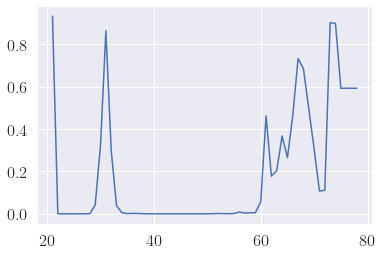

In [110]:
# z-test for "age" column

x_age = np.arange(df['age'].min(), df['age'].max() + 1)

p_value_age = []
for i in x_age:
    age_le = df[df['age'] <= i]['next_default_payment'].sum()
    age_m = df[df['age'] > i]['next_default_payment'].sum()
    n_age_le = df[df['age'] <= i].shape[0]
    n_age_m = df[df['age'] > i].shape[0]
    z_stat, p_value = proportions_ztest([age_le, age_m], [n_age_le, n_age_m], alternative = 'two-sided')
    p_value_age.append(p_value)

plt.plot(x_age, p_value_age);
x_age[np.argmax(p_value_age[2:30])]
plt.savefig('../figure/pvalue_age')

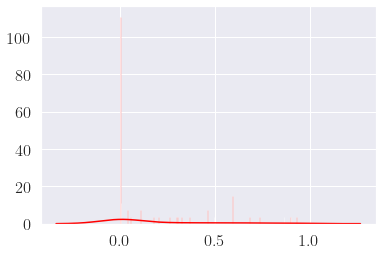

In [111]:
sns.distplot(p_value_age, kde = True, bins = 200, color = "red");

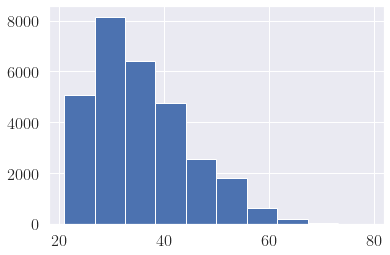

In [112]:
df['age'].hist();
plt.savefig('../figure/age_hist')

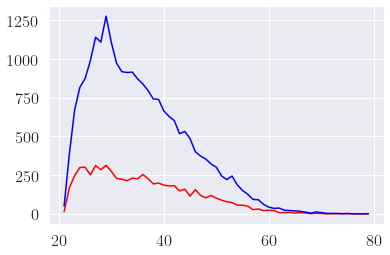

In [113]:
x_age = np.arange(df['age'].min(), df['age'].max() + 1)

default_age = []
non_default_age = []

for i in x_age:
    age_def = df[df['age'] == i]['next_default_payment'].sum()
    age_non_def = df[df['age'] == i].shape[0] - age_def
    default_age.append(age_def)
    non_default_age.append(age_non_def)
    
plt.plot(x_age, default_age, color = 'red');
plt.plot(x_age, non_default_age, color = 'blue');
# plt.legend(['default', 'non_default']);
# plt.xlabel('Age')
# plt.ylabel('Counts');
# # plt.savefig('../figure/pvalue_age')

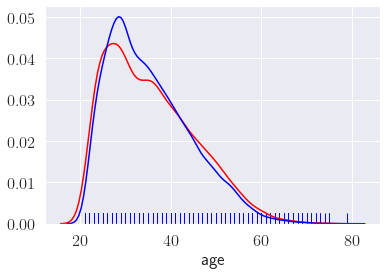

In [114]:
df_def = df[df['next_default_payment'] == 1]
df_non_def = df[df['next_default_payment'] == 0]

sns.distplot(df_def['age'], kde = True, bins = 200, color = "red", hist = False, rug = True);
sns.distplot(df_non_def['age'], kde = True, bins = 200, color = "blue", hist = False, rug = True);
# plt.legend(['Default', 'Non_default']);
# plt.xlabel('Age');


### Hypothesis Testing for "default_count" column:

- ref_value = reference value

Null hypothesis: The default in clients with total default count less than and more than "ref_value" are not significantly different.

Alternative hyphothesis: The default in clients with total default count less than and more than "ref_value" are significantly different.

alpha value = 0.05

p_value needs to be calculated and compared with alpha value

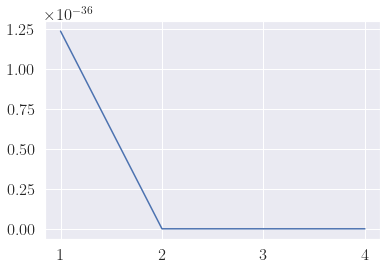

In [115]:
# z-test for "default_count" column

p_value_dc = []
for i in range(1,5):
    dc_le = df[df['default_count'] <= i]['next_default_payment'].sum()
    dc_m = df[df['default_count'] > i]['next_default_payment'].sum()
    n_le = df[df['default_count'] <= i].shape[0]
    n_m = df[df['default_count'] > i].shape[0]
    z_stat, p_value = proportions_ztest([dc_le, dc_m], [n_le, n_m], alternative = 'two-sided')
    p_value_dc.append(p_value)

plt.plot(np.arange(1,5), p_value_dc);

In [116]:
p_value_dc

[1.237031549710132e-36,
 1.945994376682736e-43,
 7.283804784694685e-51,
 9.694734205137248e-63]

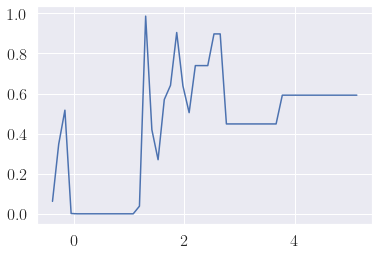

In [117]:
# z-test for "credit_usage" column

x_cu = np.linspace(df['credit_usage'].min(), df['credit_usage'].max() + 1, 59)

p_value_cu = []
for i in x_cu:
    cu_le = df[df['credit_usage'] <= i]['next_default_payment'].sum()
    cu_m = df[df['credit_usage'] > i]['next_default_payment'].sum()
    n_cu_le = df[df['credit_usage'] <= i].shape[0]
    n_cu_m = df[df['credit_usage'] > i].shape[0]
    z_stat, p_value = proportions_ztest([cu_le, cu_m], [n_cu_le, n_cu_m], alternative = 'two-sided')
    p_value_cu.append(p_value)

plt.plot(x_cu, p_value_cu);


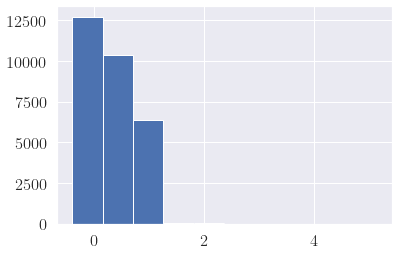

In [118]:
df['credit_usage'].hist();

### The p_value is less than defined alpha (0.05), therefore, we have enough evidence to reject the null hypothesis. Being that said,  the default in clients with total default count less than and more than "ref_value" are significantly different.

# Bayesian Testing

In [119]:
x = np.arange(0, 1.001, 0.001)

def get_beta_dist(df_baysian):
    alpha = df_baysian.sum() + 1
    beta = df_baysian.shape[0] - alpha + 1
    return scs.beta(a = alpha, b = beta)

def get_pdf(x, df_baysian):
    alpha = df_baysian.sum() + 1
    beta = df_baysian.shape[0] - alpha + 1
    return scs.beta(a = alpha, b = beta).pdf(x)

In [120]:
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label = label, lw = 2)
    plt.fill_between(x, 0, y, alpha = 0.2, color = lines[0].get_c())
    plt.legend(loc = 'best')

1.0


(0.2435219911353563, 0.20982393181563305)

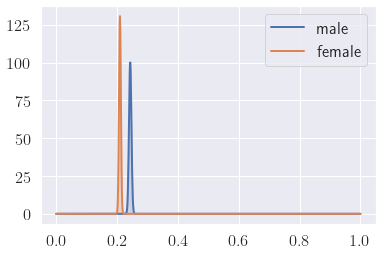

In [121]:
# Baysian testing for 'sex'

df_baysian1 = df.query('sex == 1')['next_default_payment']
df_baysian2 = df.query('sex == 2')['next_default_payment']
y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)

samp1 = get_beta_dist(df_baysian1).rvs(size=100000)
samp2 = get_beta_dist(df_baysian2).rvs(size=100000)

print((samp1 > samp2).mean())

del df_baysian1, df_baysian2

plot_with_fill(x, y1, 'male')
plot_with_fill(x, y2, 'female')
plt.savefig('../figure/bayesian_sex')


df.query('sex == 1')['next_default_payment'].mean(), df.query('sex == 2')['next_default_payment'].mean()

### The probability that male has more default than female is 1.0.

1.0


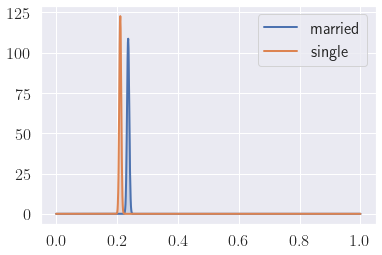

In [122]:
# Baysian testing for 'marital_status'

df_baysian1 = df.query('marital_status == 1')['next_default_payment']
df_baysian2 = df.query('marital_status == 2')['next_default_payment']
y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)

samp1 = get_beta_dist(df_baysian1).rvs(size=100000)
samp2 = get_beta_dist(df_baysian2).rvs(size=100000)

print((samp1 > samp2).mean())

del df_baysian1, df_baysian2

plot_with_fill(x, y1, 'married')
plot_with_fill(x, y2, 'single')
plt.savefig('../figure/bayesian_marital')

### The probability that married client has more default than single client is 1.0.

In [123]:
# # Baysian testing for 'age'

# df_baysian1 = df.query('age <= 29')['next_default_payment']
# df_baysian2 = df.query('age > 29')['next_default_payment']
# y1 = get_pdf(x, df_baysian1)
# y2 = get_pdf(x, df_baysian2)

# samp1 = get_beta_dist(df_baysian1).rvs(size=100000)
# samp2 = get_beta_dist(df_baysian2).rvs(size=100000)

# print((samp1 > samp2).mean())

# del df_baysian1, df_baysian2

# plot_with_fill(x, y1, '29-')
# plot_with_fill(x, y2, '29+')

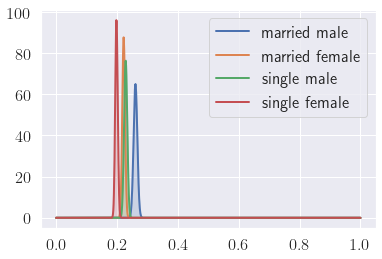

In [124]:
# Baysian testing for 'sex'-'marital_status'

df_baysian1 = df.query('sex == 1 and marital_status == 1')['next_default_payment']
df_baysian2 = df.query('sex == 2 and marital_status == 1')['next_default_payment']
df_baysian3 = df.query('sex == 1 and marital_status == 2')['next_default_payment']
df_baysian4 = df.query('sex == 2 and marital_status == 2')['next_default_payment']

y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)
y3 = get_pdf(x, df_baysian3)
y4 = get_pdf(x, df_baysian4)

del df_baysian1, df_baysian2, df_baysian3, df_baysian4

plot_with_fill(x, y1, 'married male')
plot_with_fill(x, y2, 'married female')
plot_with_fill(x, y3, 'single male')
plot_with_fill(x, y4, 'single female')
plt.savefig('../figure/bayesian_sex_marital')

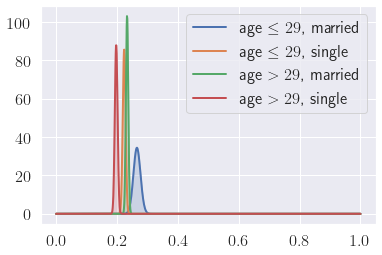

In [125]:
# Baysian testing for 'age'-'marital_status'

df_baysian1 = df.query('age <= 29 and marital_status == 1')['next_default_payment']
df_baysian2 = df.query('age <= 29 and marital_status == 2')['next_default_payment']
df_baysian3 = df.query('age > 29 and marital_status == 1')['next_default_payment']
df_baysian4 = df.query('age > 29 and marital_status == 2')['next_default_payment']

y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)
y3 = get_pdf(x, df_baysian3)
y4 = get_pdf(x, df_baysian4)

del df_baysian1, df_baysian2, df_baysian3, df_baysian4

plot_with_fill(x, y1, r'age $\le 29$, married')
plot_with_fill(x, y2, r'age $\le 29$, single')
plot_with_fill(x, y3, r'age $ > 29$, married')
plot_with_fill(x, y4, r'age $ > 29$, single')
plt.savefig('../figure/bayesian_age29_marital')

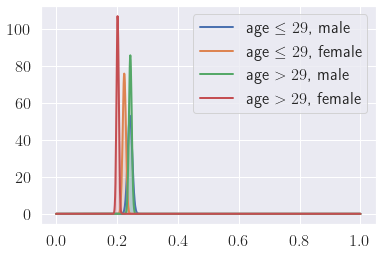

In [126]:
# Baysian testing for 'sex'-'age'

df_baysian1 = df.query('age <= 29 and sex == 1')['next_default_payment']
df_baysian2 = df.query('age <= 29 and sex == 2')['next_default_payment']
df_baysian3 = df.query('age > 29 and sex == 1')['next_default_payment']
df_baysian4 = df.query('age > 29 and sex == 2')['next_default_payment']


y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)
y3 = get_pdf(x, df_baysian3)
y4 = get_pdf(x, df_baysian4)

del df_baysian1, df_baysian2, df_baysian3, df_baysian4

plot_with_fill(x, y1, r'age $\le 29$, male')
plot_with_fill(x, y2, r'age $\le 29$, female')
plot_with_fill(x, y3, r'age $ > 29$, male')
plot_with_fill(x, y4, r'age $ > 29$, female')
plt.savefig('../figure/bayesian_age29_sex')

In [127]:
df['age'].mean()

35.46654941486843

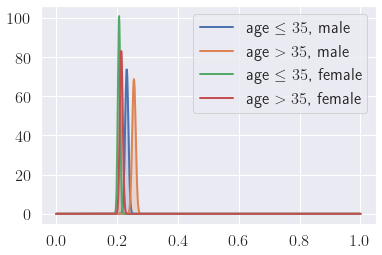

In [128]:
# Baysian testing for 'sex'-'age'

df_baysian1 = df.query('age <= 35 and sex == 1')['next_default_payment']
df_baysian2 = df.query('age > 35 and sex == 1')['next_default_payment']
df_baysian3 = df.query('age <= 35 and sex == 2')['next_default_payment']
df_baysian4 = df.query('age > 35 and sex == 2')['next_default_payment']


y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)
y3 = get_pdf(x, df_baysian3)
y4 = get_pdf(x, df_baysian4)

del df_baysian1, df_baysian2, df_baysian3, df_baysian4

plot_with_fill(x, y1, r'age $\le 35$, male')
plot_with_fill(x, y2, r'age $ > 35$, male')
plot_with_fill(x, y3, r'age $\le 35$, female')
plot_with_fill(x, y4, r'age $ > 35$, female')
plt.savefig('../figure/bayesian_age35_sex')

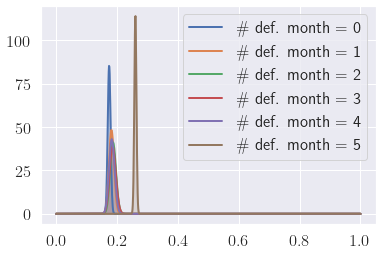

In [129]:
# Baysian testing for 'default_count'

df_baysian1 = df.query('default_count == 0')['next_default_payment']
df_baysian2 = df.query('default_count == 1')['next_default_payment']
df_baysian3 = df.query('default_count == 2')['next_default_payment']
df_baysian4 = df.query('default_count == 3')['next_default_payment']
df_baysian5 = df.query('default_count == 4')['next_default_payment']
df_baysian6 = df.query('default_count == 5')['next_default_payment']

y1 = get_pdf(x, df_baysian1)
y2 = get_pdf(x, df_baysian2)
y3 = get_pdf(x, df_baysian3)
y4 = get_pdf(x, df_baysian4)
y5 = get_pdf(x, df_baysian5)
y6 = get_pdf(x, df_baysian6)

del df_baysian1, df_baysian2, df_baysian3, df_baysian4, df_baysian5, df_baysian6

plot_with_fill(x, y1, r'$\#$ def. month = 0')
plot_with_fill(x, y2, r'$\#$ def. month = 1')
plot_with_fill(x, y3, r'$\#$ def. month = 2')
plot_with_fill(x, y4, r'$\#$ def. month = 3')
plot_with_fill(x, y5, r'$\#$ def. month = 4')
plot_with_fill(x, y6, r'$\#$ def. month = 5')
plt.savefig('../figure/bayesian_previous_default_count')

### Power Analysis

In [130]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = scs.norm(mu0, standard_error)
    ha = scs.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power